In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.7f' % x)
# set the options to see all columns, rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_info_columns', 1001)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
%matplotlib inline
plt.rc('ytick',labelsize=15)
# To use 한글 font in graphs
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False
# 그래프에서 음수값이 나올 때, 깨지는 현상 방지
plt.rc('axes', unicode_minus = False)

In [2]:
pwd

'/home/pirl/Downloads/ken/Classes/빅데이터_종합_플젝'

In [3]:
data_raw_=pd.read_csv('./datas//train/all_data.csv')

In [4]:
data=data_raw_.copy()

# 결측치 제거

식전혈당(공복혈당)    
감마지티피   
치석   

In [5]:
cols_to_handle = ['식전혈당(공복혈당)','감마지티피']

In [6]:
print("제거 전 결측치 :",)
print(data[cols_to_handle].isnull().sum())

제거 전 결측치 :
식전혈당(공복혈당)    54
감마지티피         43
dtype: int64


In [7]:
data = data.dropna(subset=cols_to_handle,how='any')

print('제거 후 결측치 :')
print(data[cols_to_handle].isnull().sum())

제거 후 결측치 :
식전혈당(공복혈당)    0
감마지티피         0
dtype: int64


In [8]:
#치석은 결측치 비율이 60%이므로 변수 자체를 제거
data = data.drop('치석', axis=1)

In [9]:
# 신장 결측치 제거
# 일단 신장과 체중 둘다 결측치인 경우 데이터를 제거한다. 

print("결측치 처리 전:")
print(data[['신장(5Cm단위)','체중(5Kg단위)']].isnull().sum())

tmp1 = data['신장(5Cm단위)'].isnull()
tmp2 = data['체중(5Kg단위)'].isnull()

data = data[~(tmp1 & tmp2)]

print("1차 결측치 처리 후:")
print(data[['신장(5Cm단위)','체중(5Kg단위)']].isnull().sum())

# 남은 결측치를 평균으로 채운다.

hmean = round(data['신장(5Cm단위)'].mean(), -1)
smean = round(data['체중(5Kg단위)'].mean(), -1)

data['신장(5Cm단위)'] = data['신장(5Cm단위)'].replace(np.nan,hmean)
data['체중(5Kg단위)'] = data['체중(5Kg단위)'].replace(np.nan,smean)

print("2차 결측치 처리 후:")
print(data[['신장(5Cm단위)','체중(5Kg단위)']].isnull().sum())

결측치 처리 전:
신장(5Cm단위)    900
체중(5Kg단위)    902
dtype: int64
1차 결측치 처리 후:
신장(5Cm단위)    5
체중(5Kg단위)    7
dtype: int64
2차 결측치 처리 후:
신장(5Cm단위)    0
체중(5Kg단위)    0
dtype: int64


101
0
시력(좌)    178
시력(우)    177
dtype: int64
시력(좌)    16
시력(우)    15
dtype: int64
시력(좌)    0
시력(우)    0
dtype: int64


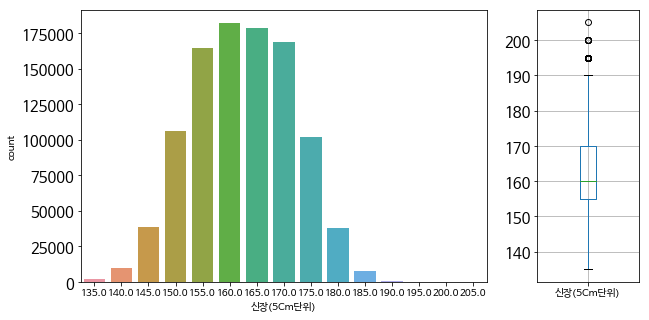

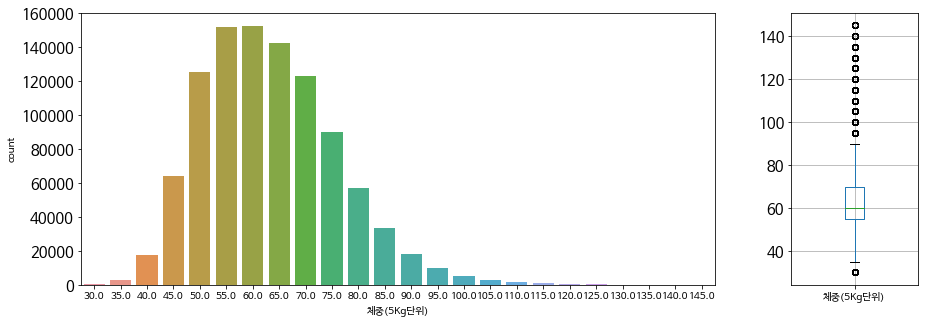

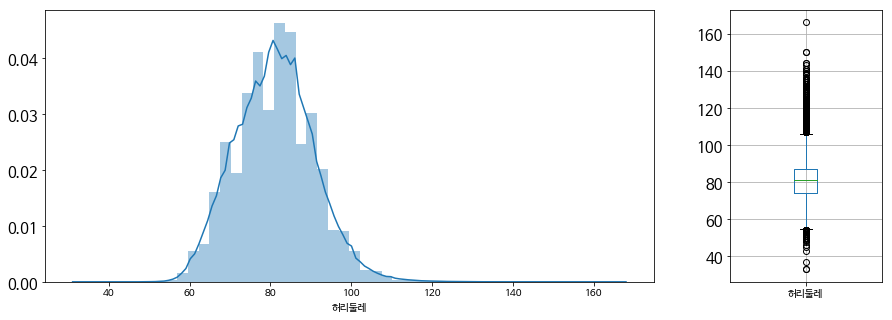

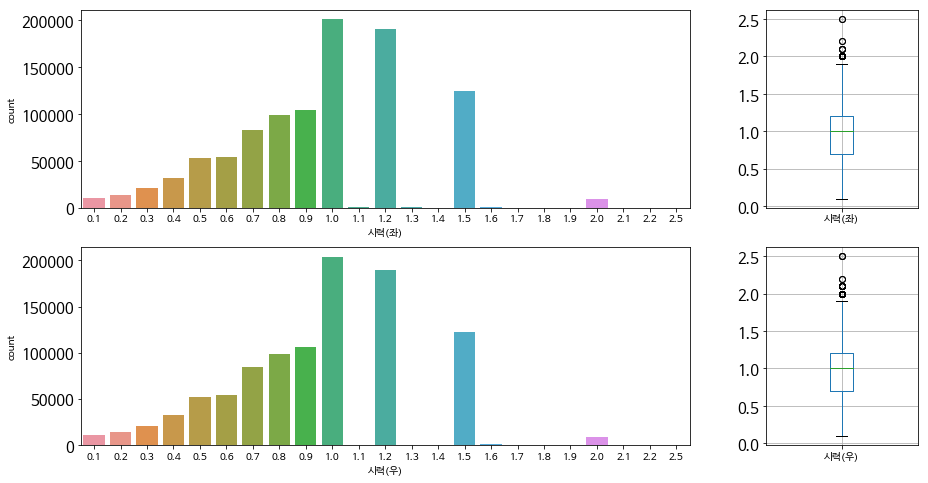

In [10]:
# 신장 이상치 제거
# 신장 130cm 이하 키 모두 제거 1900cm 키 190cm로 변경

data = data[(data['신장(5Cm단위)'] > 130)]
data['신장(5Cm단위)'] = data['신장(5Cm단위)'].replace(1900,190)

figure, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw = {'width_ratios':[4,1]})
figure.set_size_inches(10,5)

sns.countplot(data['신장(5Cm단위)'], ax=ax1);
data[['신장(5Cm단위)']].boxplot(ax = ax2);

# 체중이 25kg이하 150kg 이상인 데이터를 제거한다. 
data = data[(data['체중(5Kg단위)'] < 150) & (data['체중(5Kg단위)'] > 25)]
                                         
figure, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw = {'width_ratios':[5,1]})
figure.set_size_inches(15,5)

sns.countplot(data['체중(5Kg단위)'], ax=ax1);
data[['체중(5Kg단위)']].boxplot(ax = ax2);
#허리둘레의 결측치 제거한다.

print(data['허리둘레'].isnull().sum())

data = data[~(data['허리둘레'].isnull())]

print(data['허리둘레'].isnull().sum())
# 허리둘레는 30이하는 이상치라 판단하여 제거
# 허리둘레는 999는 말이 안되므로 제거

tmp3 = data['허리둘레'] <= 30
tmp4 = data['허리둘레'] == 999

data = data[~(tmp3 | tmp4)]

figure, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw = {'width_ratios':[4,1]})
figure.set_size_inches(15,5)

sns.distplot(data['허리둘레'], ax=ax1);
data[['허리둘레']].boxplot(ax = ax2);
#시력이 좌우 둘다 결측치인 경우 제거한다.

print(data[['시력(좌)','시력(우)']].isnull().sum())

tmp5 = data['시력(좌)'].isnull()
tmp6 = data['시력(우)'].isnull()

data = data[~(tmp5 & tmp6)]

print(data[['시력(좌)','시력(우)']].isnull().sum())

#반대 시력으로 결측치를 채운다.
data.loc[tmp5, '시력(좌)'] = data['시력(우)']
data.loc[tmp6, '시력(우)'] = data['시력(좌)']


print(data[['시력(좌)','시력(우)']].isnull().sum())  
tmp7 = data["시력(좌)"] >= 9
tmp8 = data["시력(우)"] >= 9

# 시력이 양쪽 모두 9 이상이면 제거
data = data[~(tmp7 & tmp8)]

# 한쪽만 9이상 이면 반대쪽으로 맞춤
data.loc[tmp7, '시력(좌)'] = data['시력(우)']
data.loc[tmp8, '시력(우)'] = data['시력(좌)']

figure, ax = plt.subplots(nrows = 2, ncols = 2, gridspec_kw = {'width_ratios':[4,1]})
figure.set_size_inches(15,8)

sns.countplot(data['시력(좌)'], ax=ax[0][0]);
data[['시력(좌)']].boxplot(ax = ax[0][1]);
sns.countplot(data['시력(우)'], ax=ax[1][0]);
data[['시력(우)']].boxplot(ax = ax[1][1]);

In [11]:
#혈색소 결측치 제거
data.dropna(subset=['혈색소'],how='all',inplace=True)
#혈색소 이상치 제거
data=data[data['혈색소']>3]
#요단백 결측치 처리
#최빈값인 1로 대체
data["요단백"].fillna(1,inplace=True)

#요단백 이상치 처리 없음"

In [12]:
len(data)

997577

In [13]:
data.columns

Index(['가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '구강검진 수검여부', '당뇨병 의사 판정', '고혈압 의사 판정', '간기능 이상여부', '알콜성간염여부'], dtype='object')

In [14]:
# cols_to_drop = ['수축기혈압', '이완기혈압', '식전혈당(공복혈당)','시도코드',
#                 '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
#                 '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT',
#                 '감마지티피','고혈압 의사 판정', '간기능 이상여부', '알콜성간염여부','치석',
#                '가입자일련번호']

In [15]:
all_data_done = data_raw_.drop(cols_to_drop, axis = 1)

In [16]:
all_data_done.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
성별코드           1000000 non-null int64
연령대코드(5세단위)    1000000 non-null int64
신장(5Cm단위)      999099 non-null float64
체중(5Kg단위)      999097 non-null float64
허리둘레           999803 non-null float64
시력(좌)          999700 non-null float64
시력(우)          999701 non-null float64
청력(좌)          999734 non-null float64
청력(우)          999734 non-null float64
흡연상태           999787 non-null float64
구강검진 수검여부      1000000 non-null int64
당뇨병 의사 판정      999946 non-null float64
dtypes: float64(9), int64(3)
memory usage: 91.6 MB


In [36]:
data_raw_.columns.tolist()

['가입자일련번호',
 '성별코드',
 '연령대코드(5세단위)',
 '시도코드',
 '신장(5Cm단위)',
 '체중(5Kg단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '구강검진 수검여부',
 '치석',
 '당뇨병 의사 판정',
 '고혈압 의사 판정',
 '간기능 이상여부',
 '알콜성간염여부']

In [38]:
all_data_done = data_raw_.copy()

In [41]:
all_data_done = all_data_done.dropna()

# 모델링===================================

In [42]:
x = all_data_done.drop(['당뇨병 의사 판정',], axis = 1)
y = all_data_done['당뇨병 의사 판정']
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
                '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
                '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT',
                '감마지티피','고혈압 의사 판정', '간기능 이상여부', '알콜성간염여부',]

In [21]:
#no_outlier_data = pd.read_csv('./datas/train/data_without_outlier.csv')

In [22]:
x_arr = ['성별코드',
 '연령대코드(5세단위)',
 '신장(5Cm단위)',
 '체중(5Kg단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '흡연상태',
 '구강검진 수검여부',
 '당뇨병 의사 판정',
        '수축기혈압', '이완기혈압', 
                '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
                '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT',
                '감마지티피','고혈압 의사 판정', '간기능 이상여부', '알콜성간염여부',]

In [43]:
features = []
f1_list = []
a =0
accuracy_list = []
for i in list_cols_add:
    x_arr.append(i)
    a +=1
    print(a)
    dataset = all_data_done[x_arr]
    x = dataset.drop(['당뇨병 의사 판정',], axis = 1)
    y = dataset['당뇨병 의사 판정']
    X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                       test_size=0.3, random_state=42)

    rf = RandomForestClassifier(n_jobs=-1)
    rf.fit(X_train, y_train)
    importance = pd.DataFrame({'Feature' : x.columns,
                           'Importance' : np.round(rf.feature_importances_,3)})
    importance = importance.sort_values('Importance',ascending=False)
    top5 = importance[0:5]
    features.append(top5['Feature'])
    y_pred = rf.predict(X_test)d
    accuracy_list.append(accuracy_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))


1
2
3


KeyboardInterrupt: 

In [44]:
    
boja = pd.DataFrame()
boja['feats'] = features
boja['f1']=f1_list
boja['acc'] = accuracy_list


In [45]:
boja

,feats,f1,acc
0,14 트리글리세라이드 22 감마지티피 16 LDL콜레스테롤 1...,0.0458655,0.9391485
1,14 트리글리세라이드 13 총콜레스테롤 16 LDL콜...,0.0427990,0.9390650


In [46]:
importance = pd.DataFrame({'Feature' : x.columns,
                           'Importance' : np.round(rf.feature_importances_,3)})
importance = importance.sort_values('Importance',ascending=False)
top5 = importance[0:5]
abc = []
abc.append(top5['Feature'].tolist())

ZeroDivisionError: division by zero

In [28]:
abc

[['허리둘레', '시력(좌)', '시력(우)', '체중(5Kg단위)', '연령대코드(5세단위)']]

In [47]:
def plot_feature_importances(model):
    cols = X_train.columns
    importances = model.feature_importances_
    indices = np.argsort(model.feature_importances_[:10])
    plt.barh(range(len(indices)), importances[indices], align="center", color='khaki')
    plt.yticks(range(len(indices)), [cols[i] for i in indices], size=13)
    plt.xlabel("설명변수 중요도")
    plt.ylabel('설명변수')
    plt.ylim(-1, 10)

# 설명 변수 중요도 그래프 함수 실행
plt.figure(figsize=(8,8))
plot_feature_importances(rf)
plt.title("Random Forest Feature Importance")
ten_importance_feature = rf.feature_importances_[:21]

ZeroDivisionError: division by zero

<Figure size 576x576 with 0 Axes>

In [30]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [35]:
accuracy.round(4)*100

91.230000000000004

In [ ]:
from sklearn.metrics import f1_score
print('f1 score:',f1_score(y_test, y_pred)*100)

In [ ]:
all_data.columns.tolist()

In [50]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test, y_pred)

In [51]:
cnf_matrix

array([[112198,    311],
       [  6980,    163]])

In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """model
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap,siz)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[112198    311]
 [  6980    163]]


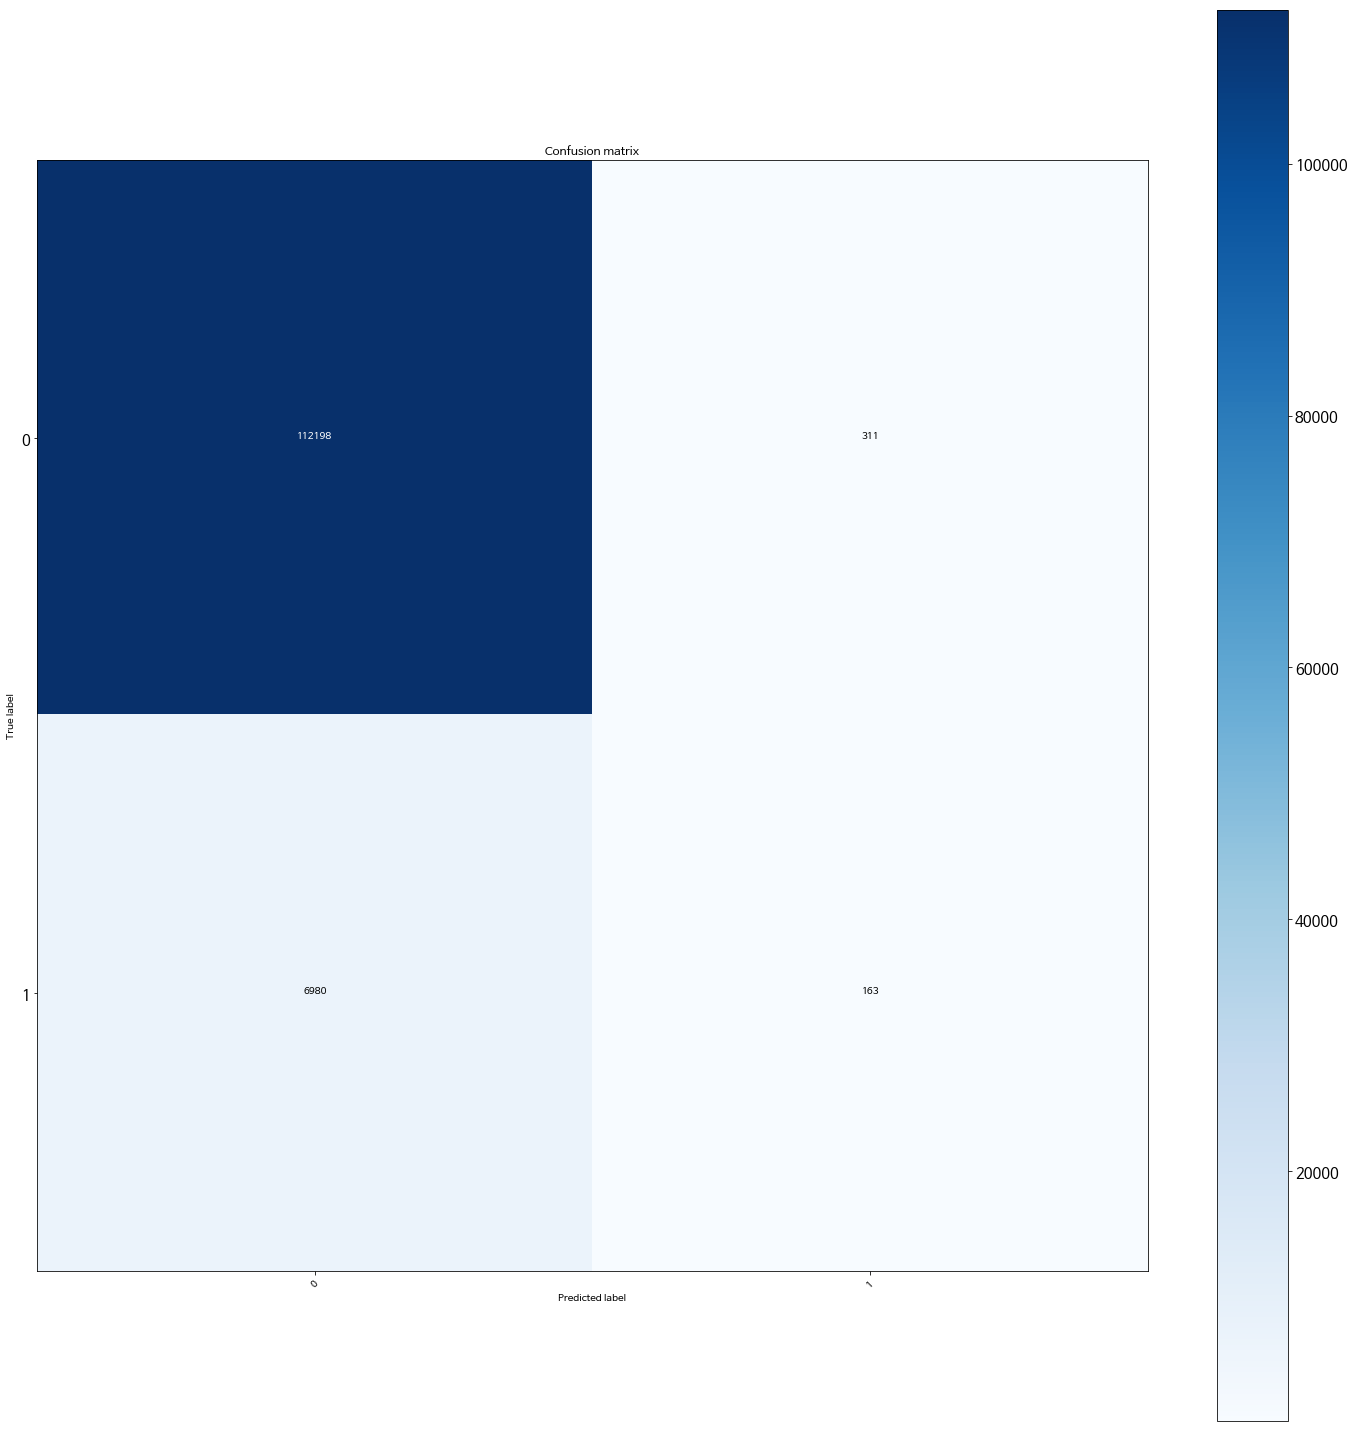

In [58]:
plt.figure(figsize=(20,20))
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix',
                     )